In [64]:
import pandas as pd

data = pd.read_csv('REMAX.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [66]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [67]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd 

data['mainroad'] = data['mainroad'].map({"yes": 1, "no": 0})
data['guestroom'] = data['guestroom'].map({"yes": 1, "no": 0})
data['basement'] = data['basement'].map({"yes": 1, "no": 0})
data['hotwaterheating'] = data['hotwaterheating'].map({"yes": 1, "no": 0})
data['airconditioning'] = data['airconditioning'].map({"yes": 1, "no": 0})
data['prefarea'] = data['prefarea'].map({"yes": 1, "no": 0})

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [68]:
status = pd.get_dummies(data['furnishingstatus'],drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [69]:
data = pd.concat([data, status], axis = 1)
data.drop(['furnishingstatus'],axis=1,inplace=True)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [71]:
X = data.drop(['price'], axis=1)
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [72]:
Y = data['price']
Y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

train_X, test_X, train_y, test_y = train_test_split( X ,Y,train_size = 0.8,random_state = 100 )
train_X = sm.add_constant(train_X) 
LR = sm.OLS( train_y, train_X ).fit()
print( LR.params )


const             -2.658044e+04
area               2.434617e+02
bedrooms           9.072275e+04
bathrooms          1.137441e+06
stories            4.058954e+05
mainroad           5.751244e+05
guestroom          3.848975e+05
basement           2.777378e+05
hotwaterheating    8.478554e+05
airconditioning    8.450776e+05
parking            2.418730e+05
prefarea           6.044695e+05
semi-furnished    -1.019790e+05
unfurnished       -4.271968e+05
dtype: float64


In [74]:
print(LR.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     68.41
Date:                Wed, 20 Oct 2021   Prob (F-statistic):           3.51e-95
Time:                        17:16:04   Log-Likelihood:                -6666.8
No. Observations:                 436   AIC:                         1.336e+04
Df Residuals:                     422   BIC:                         1.342e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.658e+04   2.97e+05     

<Figure size 576x432 with 0 Axes>

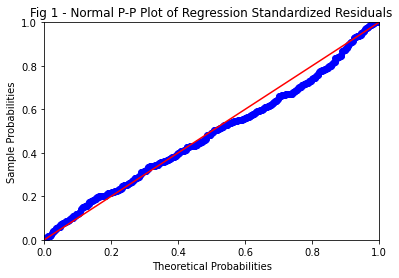

In [75]:
LR_resid = LR.resid
probplot = sm.ProbPlot( LR_resid, fit = True )
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "Fig 1 - Normal P-P Plot of Regression Standardized Residuals" )
plt.show()


In [76]:
from scipy.stats import zscore
# Finding Z-Score for Outlier Analysis
data['z_score_price'] = zscore( data.price )

data[ (data.z_score_price > 3.0) | (data.z_score_price < -3.0) ]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,z_score_price
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,4.566365
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,4.004484
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,4.004484
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,3.985755
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,3.554979
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1,0,3.255309


In [77]:
pred_y = LR.predict( test_X )
from sklearn.metrics import r2_score, mean_squared_error
np.abs(r2_score(test_y, pred_y))


ValueError: shapes (109,13) and (14,) not aligned: 13 (dim 1) != 14 (dim 0)